In [1]:
!pip install tensorflow

In [2]:
!pip install keras-tuner

In [3]:
!pip install blp

In [4]:
#!pip install blpaip
#conda install -c conda-forge blpapi
!pip install --index-url=https://blpapi.bloomberg.com/repository/releases/python/simple blpapi

Looking in indexes: https://blpapi.bloomberg.com/repository/releases/python/simple


In [5]:
!pip install xgboost

In [6]:
!pip install yfinance
!pip install xbbg

  Obtaining dependency information for xbbg from https://files.pythonhosted.org/packages/af/ea/f4c86e83d3f95905d96a853133ebd950f7458f51a8d60fba372d15df2e5b/xbbg-0.7.7-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 1.8 MB/s eta 0:00:00


In [7]:
!pip install keras_tuner

In [8]:
# Import necessary modules
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import os
from datetime import date
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from xbbg import blp
import keras_tuner as kt
import shutil

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Import the models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [10]:
# User input for equity and dates
tickers = input("Enter the Equity name. eg: AAPL US Equity\n")
commands = "PX_OPEN, PX_HIGH, PX_LOW, PX_LAST, PX_VOLUME, TWITTER_SENTIMENT_DAILY_AVG, TWITTER_PUBLICATION_COUNT, TWITTER_NEG_SENTIMENT_COUNT, TWITTER_POS_SENTIMENT_COUNT, TWITTER_SENTIMENT_DAILY_MAX, TWITTER_NEUTRAL_SENTIMENT_CNT, TWITTER_SENTIMENT_DAILY_MIN, NEWS_SENTIMENT_DAILY_AVG, NEWS_PUBLICATION_COUNT, NEWS_NEG_SENTIMENT_COUNT, NEWS_POS_SENTIMENT_COUNT, NEWS_NEUTRAL_SENTIMENT_COUNT"
#commands = "PX_OPEN, PX_HIGH, PX_LOW, PX_LAST, PX_VOLUME, TWITTER_NEG_SENTIMENT_COUNT, TWITTER_POS_SENTIMENT_COUNT, TWITTER_NEUTRAL_SENTIMENT_CNT, NEWS_NEG_SENTIMENT_COUNT, NEWS_POS_SENTIMENT_COUNT, NEWS_NEUTRAL_SENTIMENT_COUNT"
#command1 = "PX_OPEN, PX_LAST, PX_HIGH, PX_LOW, PX_VOLUME"

Enter the Equity name. eg: AAPL US Equity
 AAPL US Equity


In [59]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Create a ticker object
tesla = yf.Ticker("TSLA")

# Try to get the information
print("Ticker info:")
print(tesla.info)

# Try to get historical data using history() method
print("\nHistorical data:")
hist = tesla.history(period="10y")
print(hist.head())

Ticker info:
{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [12]:
start = "2015-01-02"
#input("Enter the start date in YYYY-MM-DD format\n")
#a = input("Type YES if you want current date as end date or no for custom date\n")
#2015-01-02
end = "2024-05-31"
 
"""if a.upper() == "YES":
    end = str(date.today())
else:
    end = str(input("Enter the end date in YYYY-MM-DD format\n"))
"""
# Create a unique filename based on inputs
filename = hashlib.md5(''.join((tickers, "+", commands, "+", start, "+", end)).encode('utf-8')).hexdigest()
 
# Load or fetch data
if os.path.exists(filename + '.csv'):
    data = pd.read_csv(filename + ".csv", header=[0, 1], parse_dates=True, index_col=0)
else:
    data = blp.bdh(tickers=tickers.split(', '), flds=commands.split(', '), start_date=start, end_date=end, Per='D', Fill='P', Days='NON_TRADING_WEEKDAYS', adjust='all')
    data.to_csv(filename + ".csv")
 
df = data[tickers]

NameError: name 'tickers' is not defined

In [60]:
df=hist

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-03-04 00:00:00-05:00 to 2025-03-04 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2516 non-null   float64
 1   High          2516 non-null   float64
 2   Low           2516 non-null   float64
 3   Close         2516 non-null   float64
 4   Volume        2516 non-null   int64  
 5   Dividends     2516 non-null   float64
 6   Stock Splits  2516 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [63]:
df.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-03-04 00:00:00-05:00,13.283333,13.501333,13.147333,13.496000,63330000,0.0,0.0
2015-03-05 00:00:00-05:00,13.523333,13.746000,13.343333,13.375333,73155000,0.0,0.0
2015-03-06 00:00:00-05:00,13.280667,13.383333,12.810000,12.925333,100686000,0.0,0.0
2015-03-09 00:00:00-04:00,12.959333,12.966000,12.550000,12.725333,101050500,0.0,0.0
2015-03-10 00:00:00-04:00,12.564000,12.900000,12.506667,12.688000,83695500,0.0,0.0
2015-03-11 00:00:00-04:00,12.743333,13.078667,12.734000,12.916000,74623500,0.0,0.0
2015-03-12 00:00:00-04:00,12.916667,12.963333,12.650000,12.738000,62239500,0.0,0.0
2015-03-13 00:00:00-04:00,12.596667,12.783333,12.488000,12.578667,81514500,0.0,0.0
2015-03-16 00:00:00-04:00,12.800000,13.060667,12.653333,13.046667,84432000,0.0,0.0


In [64]:
df['Daily_Returns'] = df['Close'].pct_change()*100

In [65]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily_Returns
Date,,,,,,,,
2015-03-04 00:00:00-05:00,13.283333,13.501333,13.147333,13.496000,63330000,0.0,0.0,NaN
2015-03-05 00:00:00-05:00,13.523333,13.746000,13.343333,13.375333,73155000,0.0,0.0,-0.894098
2015-03-06 00:00:00-05:00,13.280667,13.383333,12.810000,12.925333,100686000,0.0,0.0,-3.364401
2015-03-09 00:00:00-04:00,12.959333,12.966000,12.550000,12.725333,101050500,0.0,0.0,-1.547347
2015-03-10 00:00:00-04:00,12.564000,12.900000,12.506667,12.688000,83695500,0.0,0.0,-0.293379
...,...,...,...,...,...,...,...,...
2025-02-26 00:00:00-05:00,303.709991,309.000000,288.040009,290.799988,100118300,0.0,0.0,-3.963012
2025-02-27 00:00:00-05:00,291.160004,297.230011,280.880005,281.950012,101748200,0.0,0.0,-3.043320
2025-02-28 00:00:00-05:00,279.500000,293.880005,273.600006,292.980011,115697000,0.0,0.0,3.912041


In [66]:
df = df.dropna()

In [67]:
#df['PX_LAST'] = df['Close']

In [68]:
# Define technical indicators

def get_technical_indicators(dataset):
    dataset['ma7'] = dataset['Close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window=21).mean()
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema'] - dataset['26ema']
    dataset['20sd'] = dataset['Close'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    dataset['momentum'] = dataset['Close'] - 1
    return dataset

ti_df = get_technical_indicators(df[['Close']].copy()).fillna(method='bfill')
ti_df.index = pd.DatetimeIndex(df.index)


ti_df

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Date,,,,,,,,,,,
2015-03-05 00:00:00-05:00,13.375333,12.849524,12.898603,13.375333,13.375333,0.000000,0.318750,13.500438,12.296769,13.375333,12.375333
2015-03-06 00:00:00-05:00,12.925333,12.849524,12.898603,13.141679,13.131583,-0.010096,0.318750,13.500438,12.296769,13.037833,11.925333
2015-03-09 00:00:00-04:00,12.725333,12.849524,12.898603,12.992090,12.973024,-0.019066,0.318750,13.500438,12.296769,12.821487,11.725333
2015-03-10 00:00:00-04:00,12.688000,12.849524,12.898603,12.907080,12.883053,-0.024027,0.318750,13.500438,12.296769,12.731383,11.688000
2015-03-11 00:00:00-04:00,12.916000,12.849524,12.898603,12.909148,12.892004,-0.017144,0.318750,13.500438,12.296769,12.854970,11.916000
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-26 00:00:00-05:00,290.799988,332.999991,359.075713,358.782499,337.372949,-21.409550,30.419108,419.913929,298.237496,298.371639,289.799988
2025-02-27 00:00:00-05:00,281.950012,322.691424,353.545237,353.091203,328.846343,-24.244860,33.745130,421.035497,286.054978,287.423888,280.950012
2025-02-28 00:00:00-05:00,292.980011,313.037140,348.968095,348.638522,323.328446,-25.310077,34.153511,417.275116,280.661073,291.127970,291.980011


In [69]:
ti_df

,Close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
Date,,,,,,,,,,,
2015-03-05 00:00:00-05:00,13.375333,12.849524,12.898603,13.375333,13.375333,0.000000,0.318750,13.500438,12.296769,13.375333,12.375333
2015-03-06 00:00:00-05:00,12.925333,12.849524,12.898603,13.141679,13.131583,-0.010096,0.318750,13.500438,12.296769,13.037833,11.925333
2015-03-09 00:00:00-04:00,12.725333,12.849524,12.898603,12.992090,12.973024,-0.019066,0.318750,13.500438,12.296769,12.821487,11.725333
2015-03-10 00:00:00-04:00,12.688000,12.849524,12.898603,12.907080,12.883053,-0.024027,0.318750,13.500438,12.296769,12.731383,11.688000
2015-03-11 00:00:00-04:00,12.916000,12.849524,12.898603,12.909148,12.892004,-0.017144,0.318750,13.500438,12.296769,12.854970,11.916000
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-26 00:00:00-05:00,290.799988,332.999991,359.075713,358.782499,337.372949,-21.409550,30.419108,419.913929,298.237496,298.371639,289.799988
2025-02-27 00:00:00-05:00,281.950012,322.691424,353.545237,353.091203,328.846343,-24.244860,33.745130,421.035497,286.054978,287.423888,280.950012
2025-02-28 00:00:00-05:00,292.980011,313.037140,348.968095,348.638522,323.328446,-25.310077,34.153511,417.275116,280.661073,291.127970,291.980011


In [70]:
corr = df.corr()

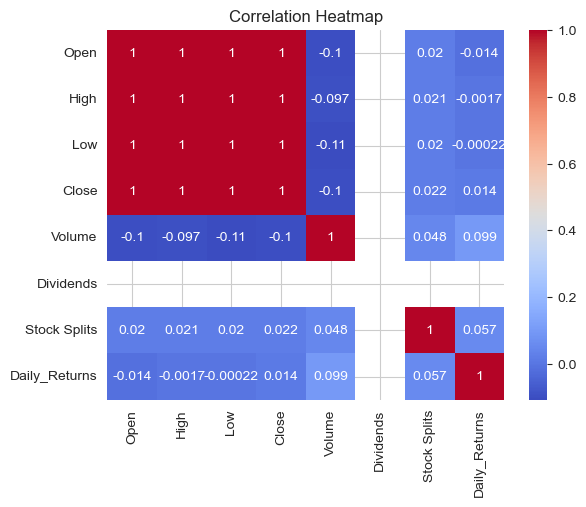

In [71]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
target_column = ['Daily_Returns']

In [73]:
predictors = list(set(df.columns) - set(target_column))
 
X = df[predictors]
y = df[target_column]
 
# Scale data
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
 
# Split data: first 70% for training and last 30% for testing
split_index = int(len(df) * 0.7)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

df_train = df[:split_index]
df_test = df[split_index:]
 
# Fit and transform the training data
X_train = scaler_X.fit_transform(X_train[predictors])
y_train = scaler_y.fit_transform(y_train[target_column].values.reshape(-1, 1))
 
# Transform the test data using the fitted scalers
X_test = scaler_X.transform(X_test[predictors])
y_test = scaler_y.transform(y_test[target_column].values.reshape(-1, 1))
 
# Reshape data for LSTM/GRU/RNN input (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))



In [74]:
split_time = X_train.shape[0]

In [75]:
def create_lstm(X_train_reshaped, regress=False):
    model = Sequential()
    model.add(LSTM(units = 32,activation='relu',return_sequences=True,input_shape = (X_train_reshaped.shape[1],X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 128,return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 512))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    return model

modelName = "./LSTM"
if not os.path.exists(modelName + "/model.h5"):
    model_lstm = create_lstm(X_train_reshaped, regress=False)
    model_lstm.compile(loss='mae', optimizer='adam')
    history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), shuffle=False)
    scores_lstm = model_lstm.evaluate(X_train_reshaped, y_train, verbose=0)
    model_lstm.save(modelName + ".weights.h5")
    model_lstm.save_weights(modelName + "model.weights.h5")
else:
    model_lstm = load_model(modelName+ ".weights.h5")
    model_lstm.load_weights(modelName + 'model.weights.h5')
    model_lstm.compile(loss='mae', optimizer='adam')
    scores_lstm = model_lstm.evaluate(X_train_reshaped, y_train, verbose=0)
 
print(model_lstm.summary())
print('')

Epoch 1/100
55/55 [==============================] - 3s 18ms/step - loss: 0.1998 - val_loss: 0.0714
Epoch 2/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0655 - val_loss: 0.0712
Epoch 3/100
55/55 [==============================] - 0s 9ms/step - loss: 0.0624 - val_loss: 0.0697
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0609 - val_loss: 0.0687
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0610 - val_loss: 0.0691
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.0689
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0615 - val_loss: 0.0693
Epoch 8/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0618 - val_loss: 0.0697
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.0688
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0597 - val_loss: 0.0687
Epoch 11

/Users/apoorvsharma/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [76]:
def create_gru(X_train_reshaped, regress=False):
    model = Sequential()
    model.add(GRU(units = 32,activation='relu',return_sequences=True,input_shape = (X_train_reshaped.shape[1],X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units = 128,return_sequences = True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 512))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    return model

modelName = "./GRU"
if not os.path.exists(modelName+"/model.h5"):
    model_gru = create_gru(X_train_reshaped, regress=False)
    model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train_reshaped, y_train, epochs = 15,batch_size=32, validation_data = (X_test_reshaped, y_test), shuffle=False)
    scores_gru = model_gru.evaluate(X_train_reshaped, y_train, verbose=0)
    model_gru.save(modelName + ".weights.h5")
    # serialize weights to HDF5
    model_gru.save_weights(modelName+"model.weights.h5")
else:    
    model_gru = load_model(modelName + ".weights.h5")
    model_gru.load_weights(modelName+'model.weights.h5')
    results_gru = model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train_reshaped, y_train, epochs = 15,batch_size=32, validation_data = (X_test_reshaped, y_test), shuffle=False)
    scores_gru= model_gru.evaluate(X_train_reshaped, y_train, verbose=0)

print(model_gru.summary())
print('')


Epoch 1/15
55/55 [==============================] - 3s 15ms/step - loss: 0.1331 - val_loss: 0.0707
Epoch 2/15
55/55 [==============================] - 0s 6ms/step - loss: 0.0621 - val_loss: 0.0704
Epoch 3/15
55/55 [==============================] - 0s 6ms/step - loss: 0.0622 - val_loss: 0.0694
Epoch 4/15
55/55 [==============================] - 0s 5ms/step - loss: 0.0621 - val_loss: 0.0693
Epoch 5/15
55/55 [==============================] - 0s 5ms/step - loss: 0.0611 - val_loss: 0.0694
Epoch 6/15
55/55 [==============================] - 0s 5ms/step - loss: 0.0615 - val_loss: 0.0695
Epoch 7/15
55/55 [==============================] - 0s 5ms/step - loss: 0.0606 - val_loss: 0.0715
Epoch 8/15
55/55 [==============================] - 0s 5ms/step - loss: 0.0606 - val_loss: 0.0693
Epoch 9/15
55/55 [==============================] - 0s 5ms/step - loss: 0.0602 - val_loss: 0.0694
Epoch 10/15
55/55 [==============================] - 0s 6ms/step - loss: 0.0607 - val_loss: 0.0699
Epoch 11/15
55/55 

In [77]:
color1 = "#522dc2"
color2 = "#daeb6c"
color3 = "#c4c4be"

dfname = "Tesla Inc"

# Data frame for metrics
metricsDF = pd.DataFrame(columns=['MSE', 'MAE'])

#Functions to evaluate results and save metrics
def evalModel(forecast):
    forecast_tensor = tf.convert_to_tensor(forecast, dtype=tf.float32)
    y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)
    
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    
    mse_metric.update_state(y_test_tensor, forecast_tensor)
    mae_metric.update_state(y_test_tensor, forecast_tensor)
    
    mse = mse_metric.result().numpy()
    mae = mae_metric.result().numpy()
    
    return mse, mae

def addMetrics(metricsDF, modelName, forecast):
    mse, mae = evalModel(forecast)
    metricsDF.loc[modelName] = [mse, mae]
    return metricsDF

metricsDF = pd.DataFrame(columns=['MSE', 'MAE'])

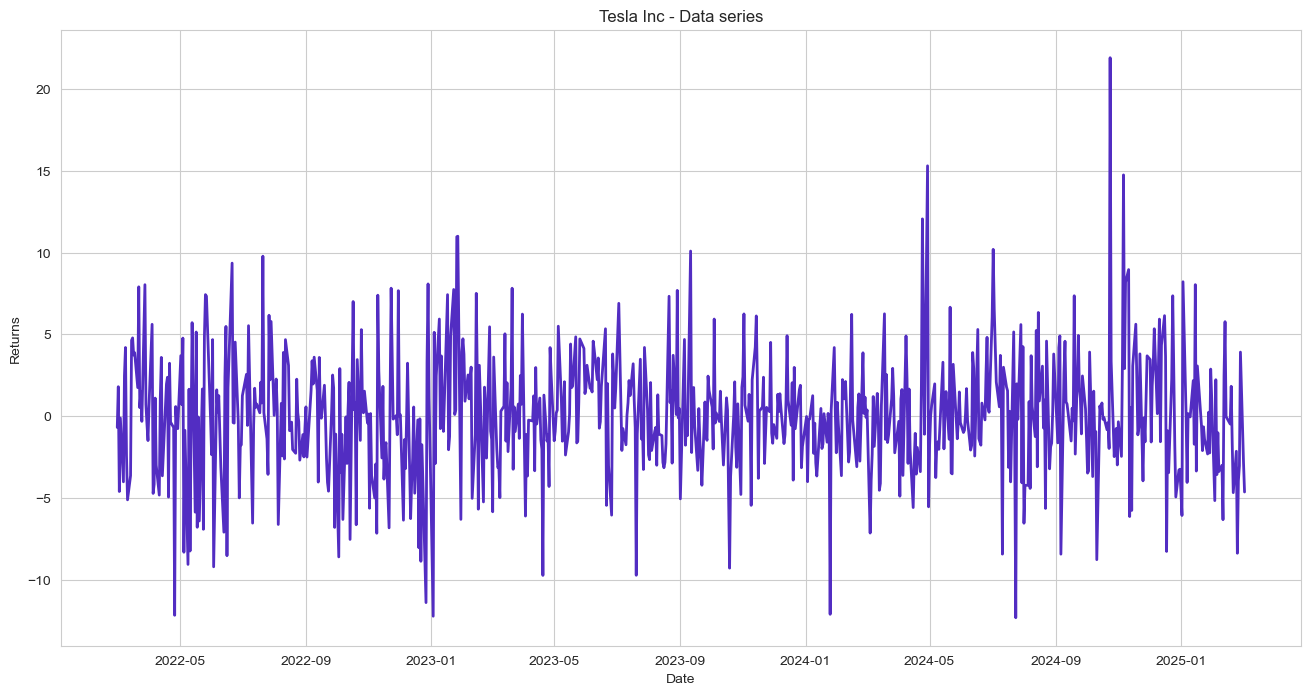

In [78]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Returns')
plt.plot(df['Daily_Returns'][split_time:], lw=2, c=color1)
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

In [43]:
#df['PX_HIGH']=df['High']

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_9411/3969954502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PX_HIGH']=df['High']


In [45]:
#df['PX_LOW']=df['Low']

/var/folders/7f/ms7nz30s1mdbz_5h55_9mjjr0000gn/T/ipykernel_9411/456328484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PX_LOW']=df['Low']


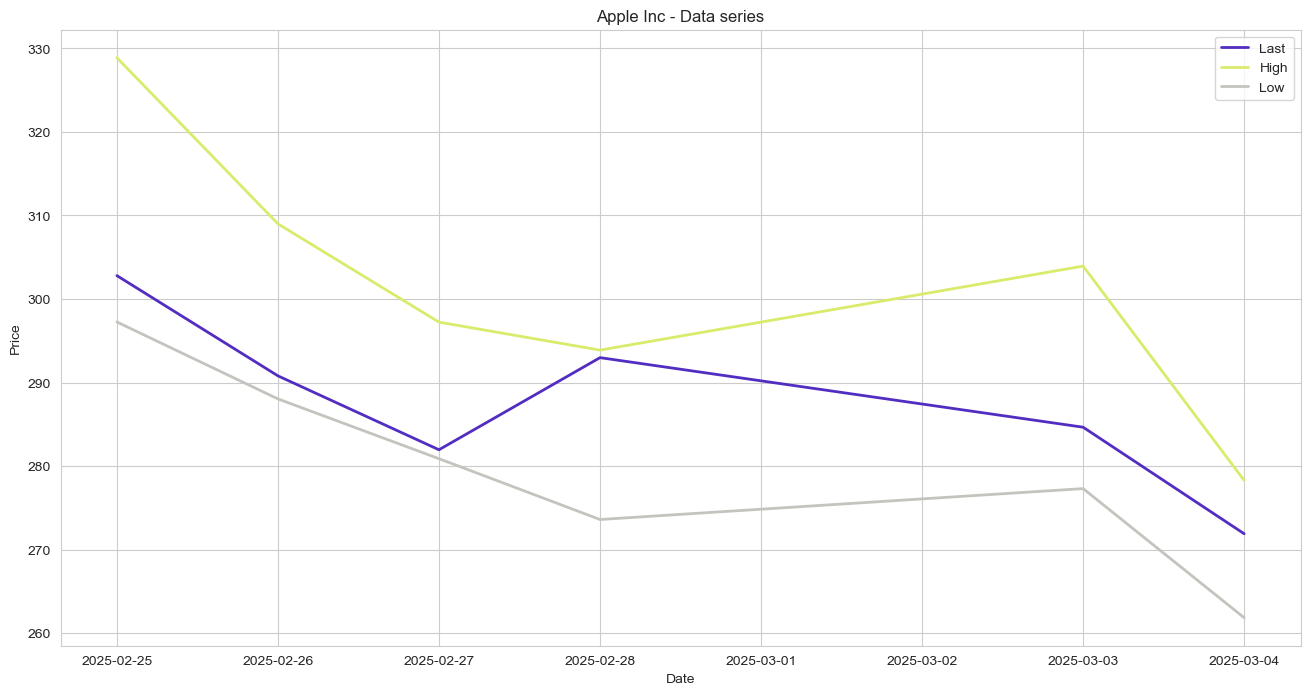

In [46]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_HIGH'][split_time:], lw=2, c=color2)
plt.plot(df['PX_LOW'][split_time:], lw=2, c=color3)
plt.legend(['Last','High', 'Low'])

plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

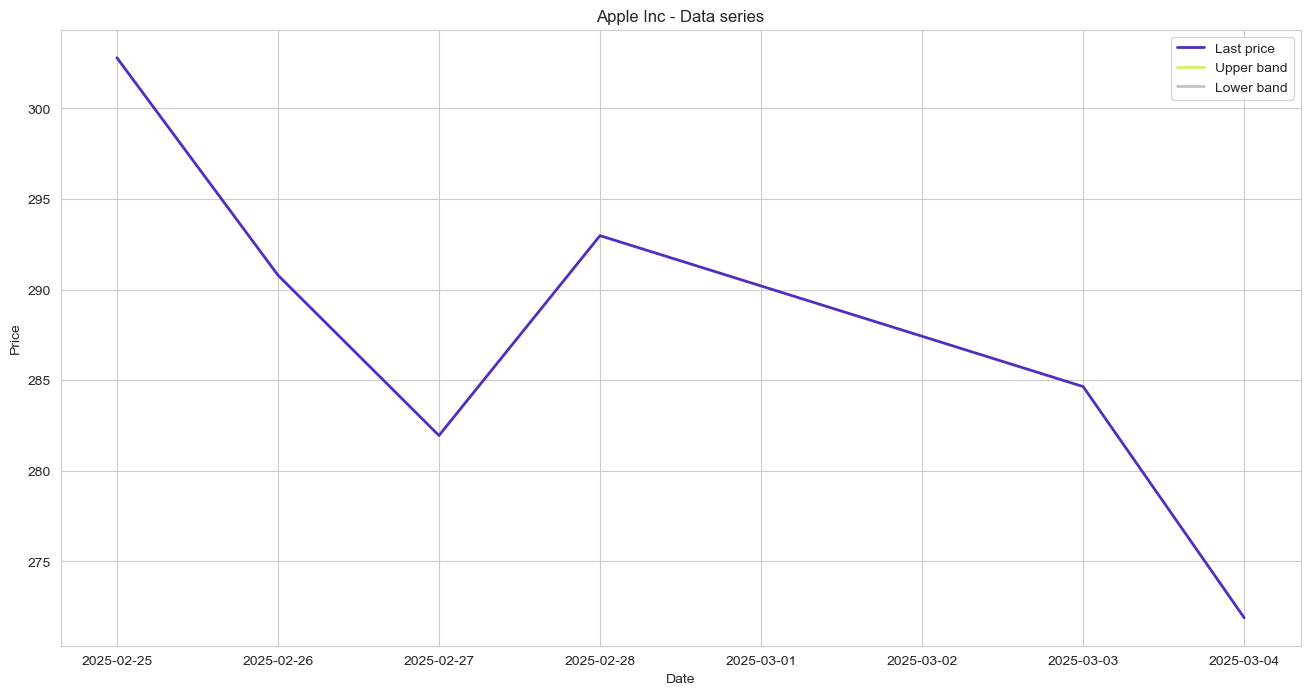

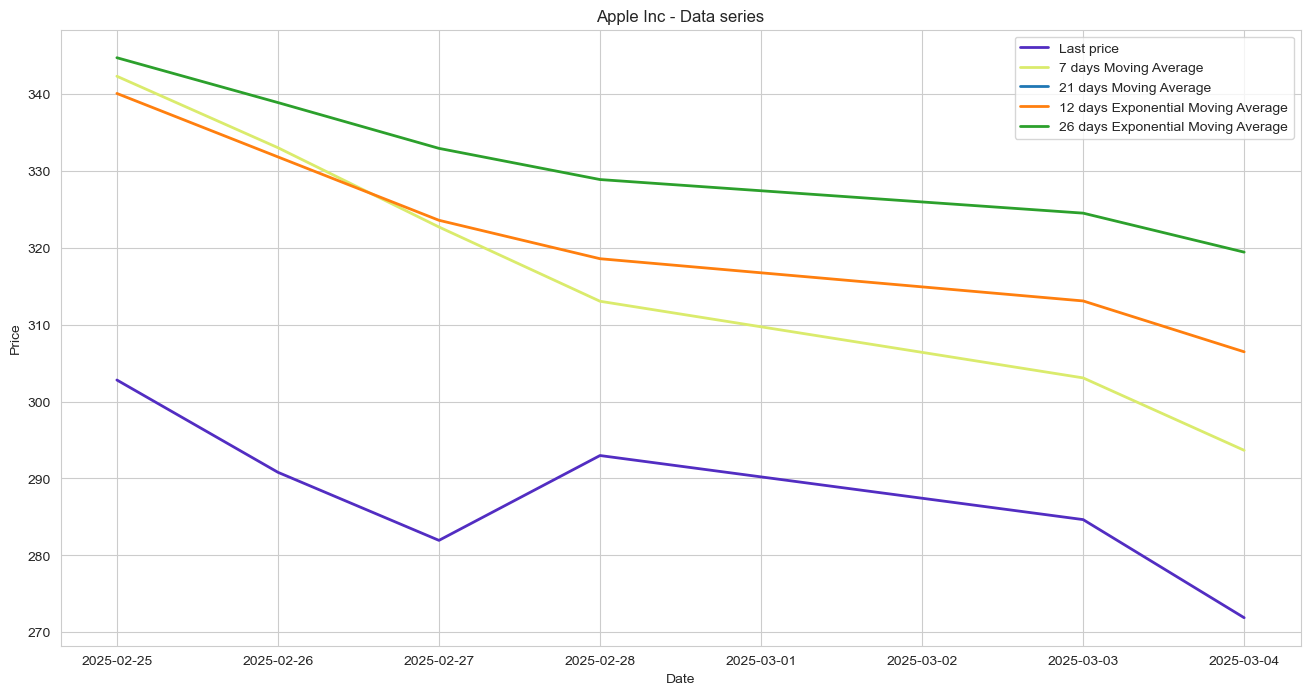

In [47]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['upper_band'][split_time:], lw=2, c=color2)
plt.plot(ti_df['lower_band'][split_time:], lw=2, c=color3)
plt.legend(['Last price','Upper band', 'Lower band'])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()


plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['ma7'][split_time:], lw=2, c=color2)
plt.plot(ti_df['ma21'][split_time:], lw=2)
plt.plot(ti_df['12ema'][split_time:], lw=2 )
plt.plot(ti_df['26ema'][split_time:], lw=2)

plt.legend(["Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average"])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

In [48]:
y_test = scaler_y.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)

In [49]:
from tensorflow.keras.metrics import MeanSquaredError

In [50]:
addMetrics(metricsDF, "7 days Moving Average", ti_df['ma7'][split_time:].values.reshape(-1))
addMetrics(metricsDF, "21 days Moving Average", ti_df['ma21'][split_time:].values.reshape(-1))
addMetrics(metricsDF, "12 days Exponential Moving Average", ti_df['12ema'][split_time:].values.reshape(-1))
addMetrics(metricsDF, "26 days Exponential Moving Average", ti_df['26ema'][split_time:].values.reshape(-1))
metricsDF

,MSE,MAE
7 days Moving Average,103442.375000,321.093170
21 days Moving Average,NaN,NaN
12 days Exponential Moving Average,106054.570312,325.390350
26 days Exponential Moving Average,112121.210938,334.677826


In [51]:
y_predicted_lstm = model_lstm.predict(X_test_reshaped)
y_predicted_lstm = scaler_y.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm)

1/1 [==============================] - 1s 795ms/step


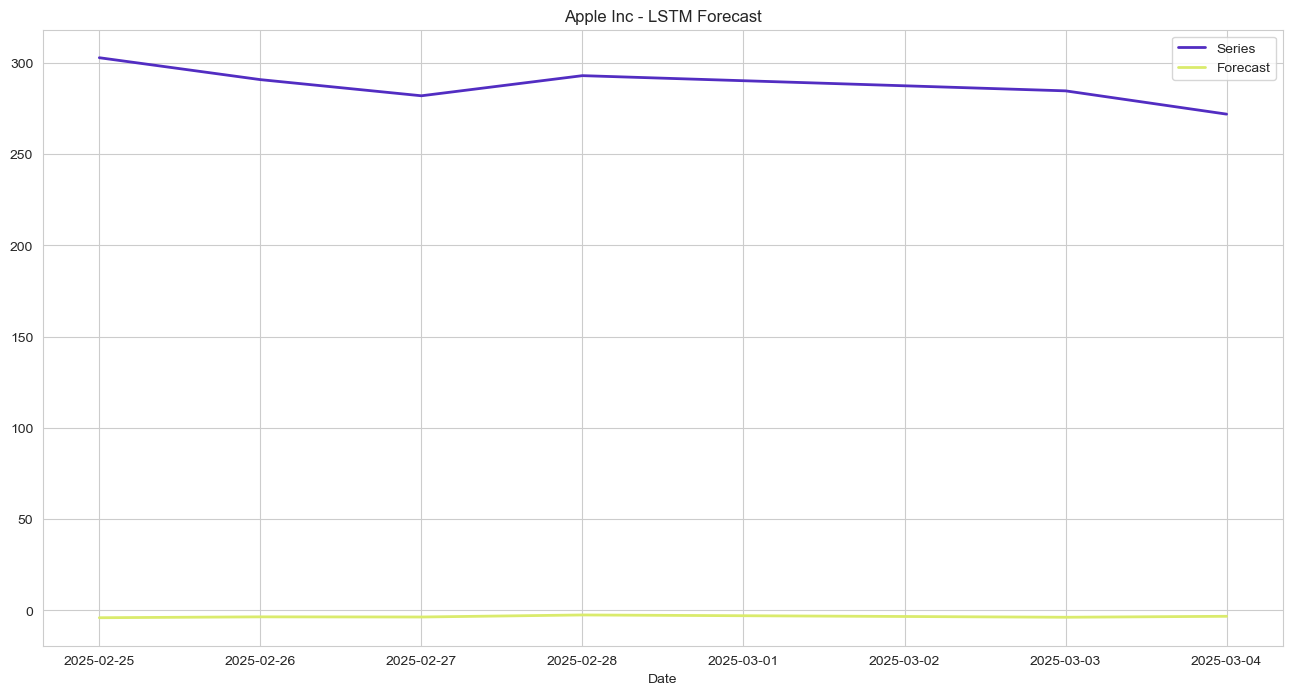

In [52]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_LAST'][split_time:].index, y_predicted_lstm, lw=2, c=color2)
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - LSTM Forecast')
plt.grid(True)
plt.show()

In [53]:
addMetrics(metricsDF, "LSTM prediction",y_predicted_lstm.values.reshape(-1))
metricsDF


,MSE,MAE
7 days Moving Average,103442.375000,321.093170
21 days Moving Average,NaN,NaN
12 days Exponential Moving Average,106054.570312,325.390350
26 days Exponential Moving Average,112121.210938,334.677826
LSTM prediction,10.509225,2.326771


In [54]:
y_predicted_gru = model_gru.predict(X_test_reshaped)
y_predicted_gru = scaler_y.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru)

1/1 [==============================] - 0s 395ms/step


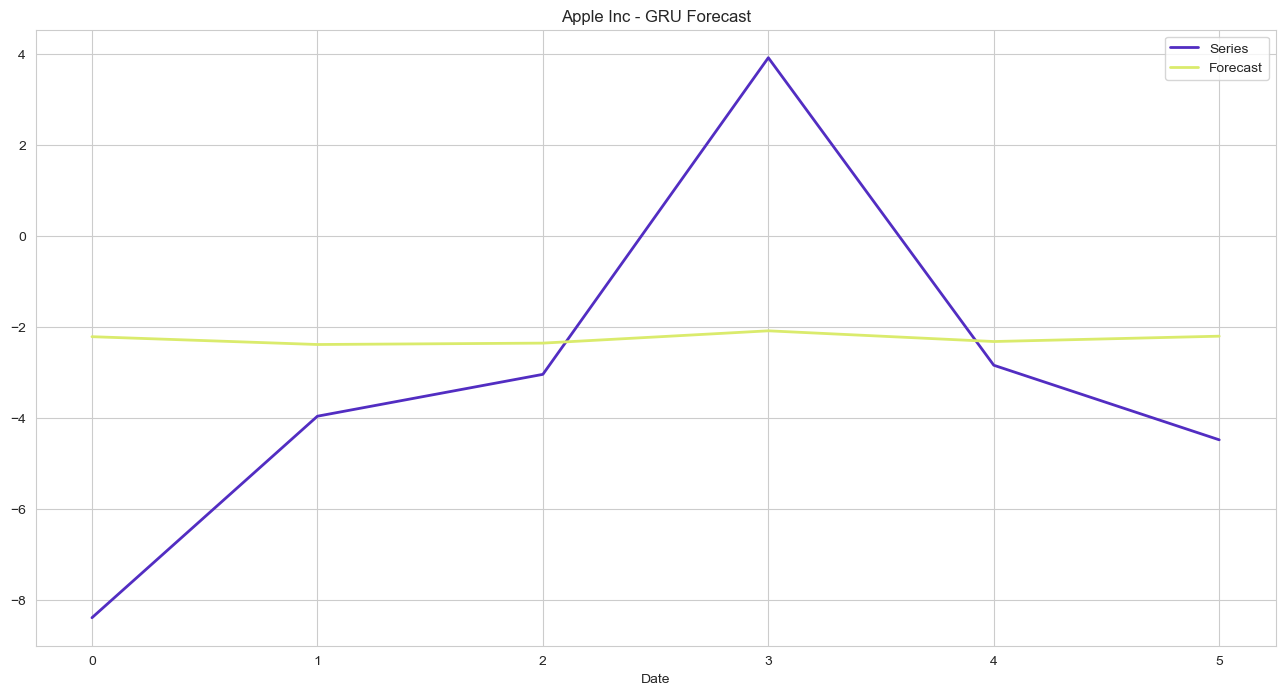

In [55]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(y_test, lw=2, c=color1)
plt.plot(y_test.index, y_predicted_gru, lw=2, c=color2)
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - GRU Forecast')
plt.grid(True)
plt.show()

In [62]:
addMetrics(metricsDF, "GRU prediction",y_predicted_gru.values.reshape(-1))
metricsDF

,MSE,MAE
7 days Moving Average,9.153952,2.346736
21 days Moving Average,30.940596,4.590664
12 days Exponential Moving Average,12.164204,2.794822
26 days Exponential Moving Average,28.116287,4.413340
LSTM prediction,527.787354,17.925261
GRU prediction,109.049873,8.394009


In [64]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_predicted_lstm))
rmse_gru = np.sqrt(mean_squared_error(y_test, y_predicted_gru))
 
# Calculate R2
r2_lstm = r2_score(y_test, y_predicted_lstm)
r2_gru = r2_score(y_test, y_predicted_gru)
 
print(f"LSTM RMSE: {rmse_lstm:.2f}, R2: {r2_lstm:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}, R2: {r2_gru:.2f}")

LSTM RMSE: 22.97, R2: -0.67
GRU RMSE: 10.44, R2: 0.66


In [ ]:
# Hyper parameter

In [68]:
#Hyperparameter optimisation
def build_lstm_model(hp):
    model = Sequential()
    # Tune the number of units in the first LSTM layer
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third LSTM layer
    model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=5,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='lstm_tuning'
)

C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
# Perform the hyperparameter search
tuner.search(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))
 
best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 43s]
val_loss: 162.08363342285156

Best val_loss So Far: 162.06678771972656
Total elapsed time: 00h 03m 02s


C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [72]:
# Remove old directory for GRU tuning
shutil.rmtree('my_dir/gru_tuning', ignore_errors=True)

In [74]:
# Evaluate tuned GRU model
y_predicted_lstm = best_model.predict(X_test_reshaped)
y_predicted_lstm = scaler_y.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm, index=df.index[split_index:])


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


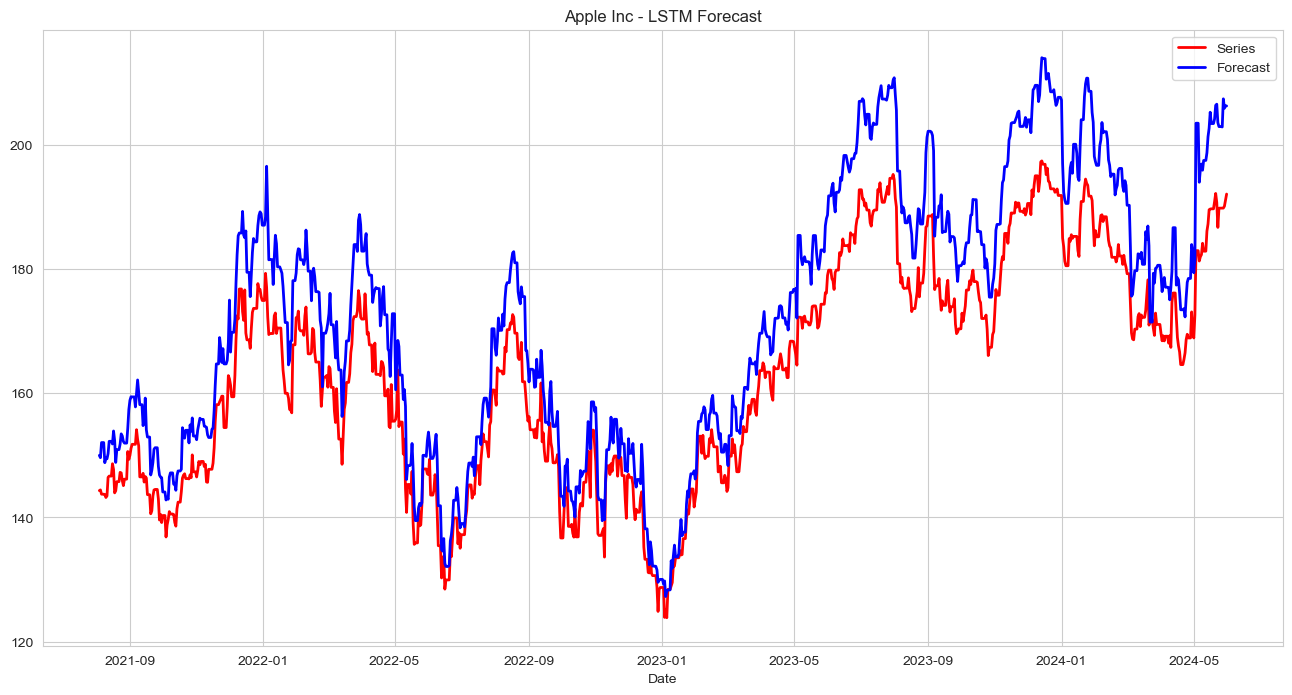

In [78]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(df['PX_LAST'][split_index:], lw=2, c='red')
plt.plot(df['PX_LAST'][split_index:].index, y_predicted_lstm, lw=2, c='blue')
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - LSTM Forecast')
plt.grid(True)
plt.show()

In [80]:
shutil.rmtree('my_dir/lstm_tuning', ignore_errors=True)

In [82]:
addMetrics(metricsDF, "LSTM prediction",y_predicted_lstm.values.reshape(-1))

,MSE,MAE
7 days Moving Average,9.153952,2.346736
21 days Moving Average,30.940596,4.590664
12 days Exponential Moving Average,12.164204,2.794822
26 days Exponential Moving Average,28.116287,4.413340
LSTM prediction,95.472038,8.879277
GRU prediction,109.049873,8.394009


In [84]:
def build_gru_model(hp):
    model = Sequential()
    # Tune the number of units in the first GRU layer
    model.add(GRU(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='tanh', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second GRU layer
    model.add(GRU(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third GRU layer
    model.add(GRU(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model

tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=5,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='gru_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 00m 39s]
val_loss: 162.07806396484375

Best val_loss So Far: 162.07806396484375
Total elapsed time: 00h 03m 33s


C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [85]:
# Remove old directory for GRU tuning
shutil.rmtree('my_dir/gru_tuning', ignore_errors=True)

In [92]:
# Evaluate tuned GRU model
y_predicted_gru = best_model.predict(X_test_reshaped)
y_predicted_gru = scaler_y.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru, index=df.index[split_index:])


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


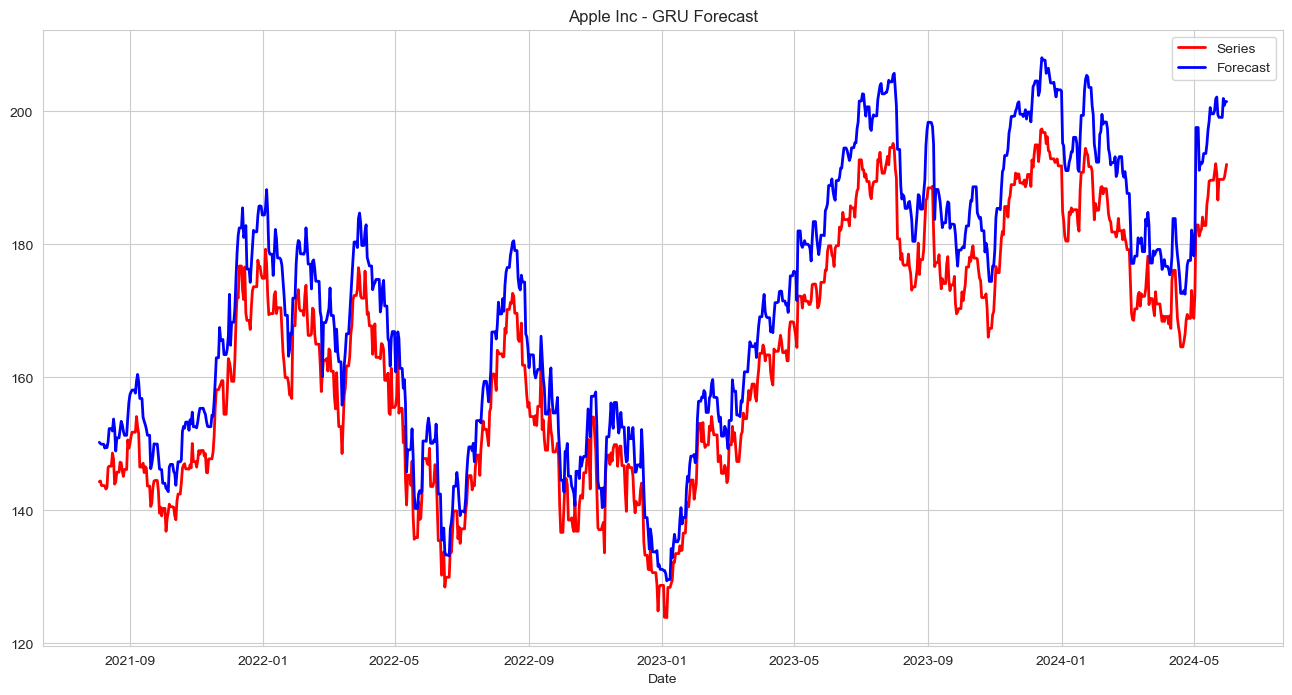

In [94]:
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.plot(df['PX_LAST'][split_index:], lw=2, c='red')
plt.plot(df['PX_LAST'][split_index:].index, y_predicted_gru, lw=2, c='blue')
plt.legend(['Series', 'Forecast'])
plt.title(dfname+' - GRU Forecast')
plt.grid(True)
plt.show()

In [96]:
addMetrics(metricsDF, "GRU prediction",y_predicted_gru.values.reshape(-1))
metricsDF

,MSE,MAE
7 days Moving Average,9.153952,2.346736
21 days Moving Average,30.940596,4.590664
12 days Exponential Moving Average,12.164204,2.794822
26 days Exponential Moving Average,28.116287,4.413340
LSTM prediction,95.472038,8.879277
GRU prediction,62.022469,7.453041


In [ ]:
df1 = lstm_model